# Lung Cancer Analysis 🫁〽️

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## รายละเอียดชุดข้อมูล
- dataset ที่เก็บข้อมูลเกี่ยวกับมะเร็งปอด
- ที่มา https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4

## คำอธิบายข้อมูล

<table>
  <tr>
    <th>Columns</th>
    <th>คำอธิบาย</th>
  </tr>
  <tr>
    <td>GENDER</td>
    <td>เพศของบุคคล</td>
  </tr>
  <tr>
    <td>AGE</td>
    <td>อายุของบุคคล</td>
  </tr>
  <tr>
    <td>SMOKING</td>
    <td>ข้อมูลเกี่ยวกับการสูบบุหรี่</td>
  </tr>
  <tr>
    <td>YELLOW_FINGERS</td>
    <td>อาการนิ้วเหลือง</td>
  </tr>
  <tr>
    <td>ANXIETY</td>
    <td>ความวิตกกังวลของบุคคล</td>
  </tr>
  <tr>
    <td>PEER_PRESSURE</td>
    <td>ความกดดันจากเพื่อนร่วมงานหรือสังคม</td>
  </tr>
  <tr>
    <td>CHRONIC DISEASE</td>
    <td>การเป็นโรคเรื้อรัง</td>
  </tr>
  <tr>
    <td>FATIGUE</td>
    <td>ความรู้สึกเหนื่อยล้าหรืออ่อนเพลีย</td>
  </tr>
  <tr>
    <td>ALLERGY</td>
    <td>การมีอาการแพ้หรือภูมิแพ้</td>
  </tr>
  <tr>
    <td>WHEEZING</td>
    <td>อาการหอบหืดหรือเสียงหายใจแหบ</td>
  </tr>
  <tr>
    <td>ALCOHOL CONSUMING</td>
    <td>การดื่มแอลกอฮอล์</td>
  </tr>
  <tr>
    <td>COUGHING</td>
    <td>อาการไอ</td>
  </tr>
  <tr>
    <td>SHORTNESS OF BREATH</td>
    <td>การหายใจลำบาก หรือหายใจไม่ทัน</td>
  </tr>
  <tr>
    <td>SWALLOWING DIFFICULTY</td>
    <td>อาการกลืนลำบาก</td>
  </tr>
  <tr>
    <td>CHEST PAIN</td>
    <td>อาการปวดหน้าอก</td>
  </tr>
  <tr>
    <td>LUNG_CANCER</td>
    <td>การเป็นมะเร็งปอด</td>
  </tr>
</table>


## จัดเตรียมข้อมูล

In [2]:
df = pd.read_csv("data.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

 #### เช็คแถวและคอลัมน์

In [4]:
df.shape

(309, 16)

#### เปลี่ยนชื่อคอลัมน์

In [5]:
df = df.rename(columns={'FATIGUE ': 'FATIGUE'})
df = df.rename(columns={'ALLERGY ': 'ALLERGY'})

#### เช็คชื่อคอลัมน์ใหม่

In [6]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

#### เปลี่ยนข้อมูลในแถว

In [7]:
columns_to_transform = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
    'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'
]

for column in columns_to_transform:
    df[column] = df[column].replace({1: 0, 2: 1})

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


- M = MALE
- F = FEMALE
- 1 = YES
- 0 = NO

#### ดูข้อมูล dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

#### ตรวจสอบค่า null

In [10]:
df.isna().any()

GENDER                   False
AGE                      False
SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
PEER_PRESSURE            False
CHRONIC DISEASE          False
FATIGUE                  False
ALLERGY                  False
WHEEZING                 False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

## การวิเคราะห์ข้อมูล

#### สร้าง dataframe เฉพาะสำหรับเคสที่เป็นมะเร็งปอด

In [11]:
df_positivecase = df[df['LUNG_CANCER'] == "YES"]
df_positivecase.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
150,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES
110,M,58,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
302,F,65,1,1,1,1,0,1,0,1,0,1,1,1,0,YES
175,F,59,1,1,1,1,1,1,0,1,0,1,0,1,1,YES
89,F,55,1,0,0,1,1,1,1,1,1,0,0,1,1,YES


In [12]:
df_positivecase.shape

(270, 16)

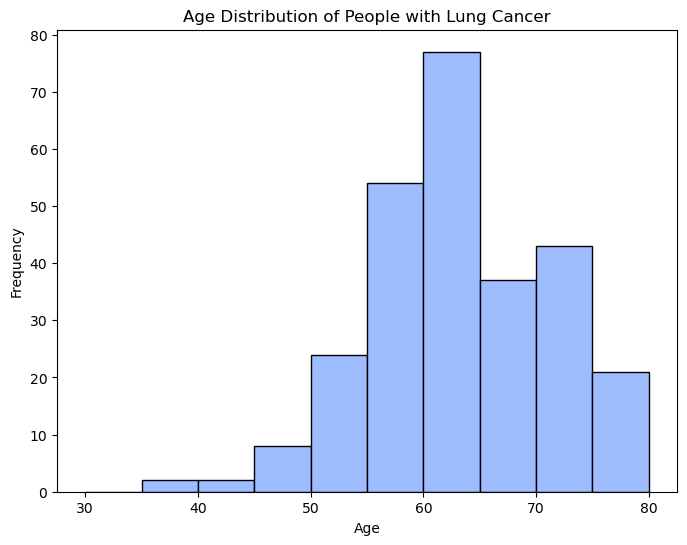

In [13]:
plt.figure(figsize=(8, 6))
bins = [30,35,40, 45, 50, 55, 60, 65, 70, 75, 80]
plt.hist(df_positivecase['AGE'], bins=bins, color='#9DBDFF', edgecolor='black')

plt.title('Age Distribution of People with Lung Cancer')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

#### ช่วงอายุที่พบมากที่สุดคือ 60-65 

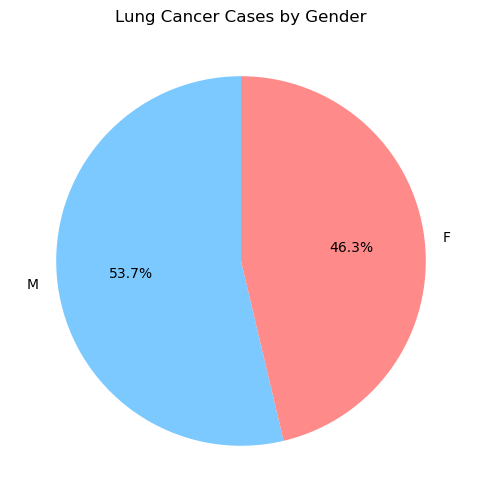

In [14]:
gender_counts = df_positivecase['GENDER'].value_counts()

# สร้างแผนภูมิวงกลม
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#7BC9FF', '#FF8A8A'], startangle=90)

# ตั้งชื่อกราฟ
plt.title('Lung Cancer Cases by Gender')

# แสดงกราฟ
plt.ylabel('')  # ลบชื่อแกน y
plt.show()

#### ผู้ป่วยส่วนใหญ่เป็นผู้ชาย

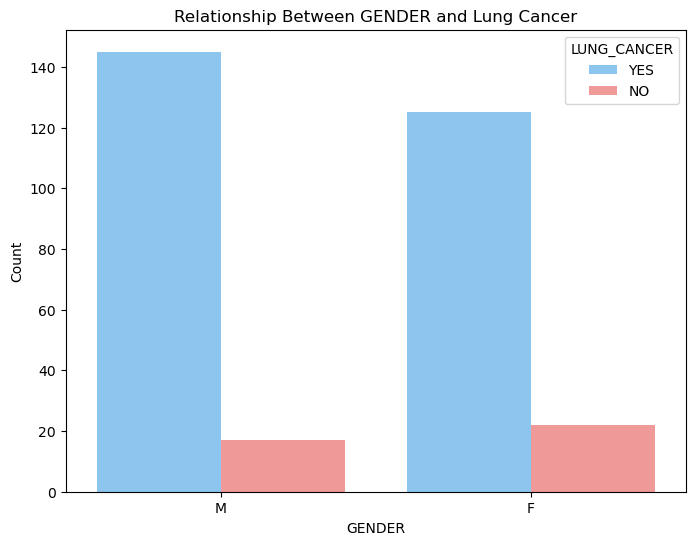

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GENDER', hue='LUNG_CANCER', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and Lung Cancer')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

## วิเคราะห์พฤติกรรมและโรคของผู้ที่เป็นมะเร็งปอด โดยแยกเพศ

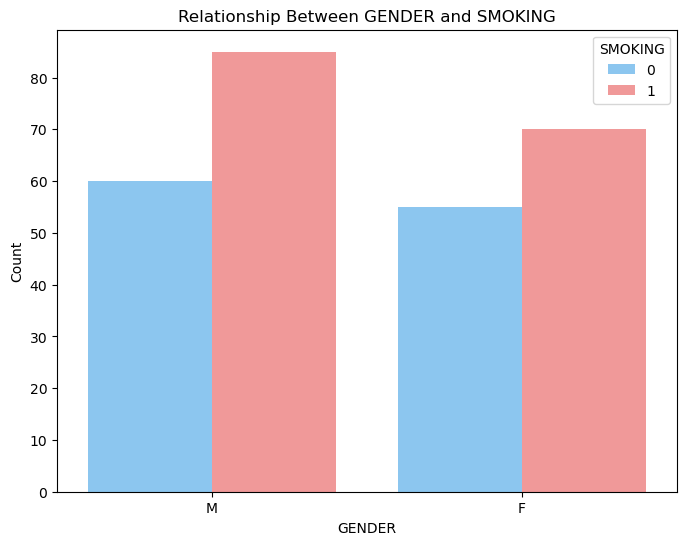

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_positivecase, x='GENDER', hue='SMOKING', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and SMOKING')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

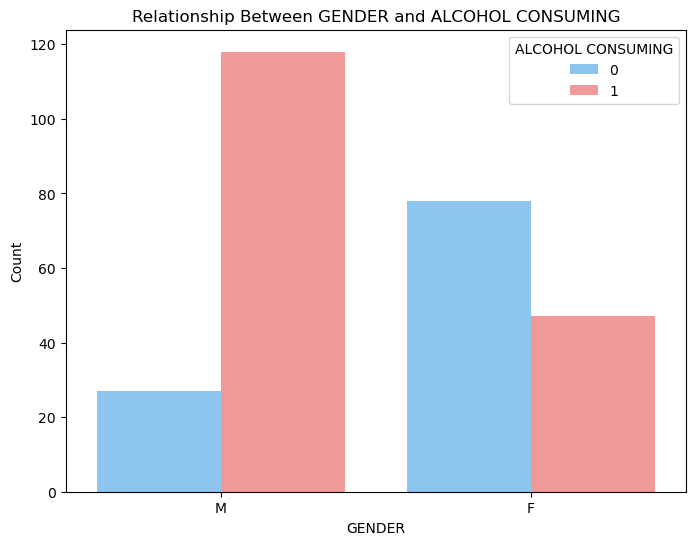

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_positivecase, x='GENDER', hue='ALCOHOL CONSUMING', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and ALCOHOL CONSUMING')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

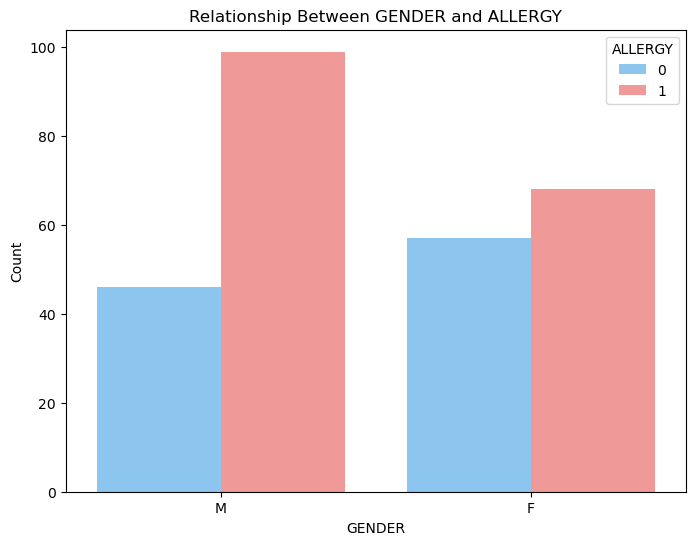

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_positivecase, x='GENDER', hue='ALLERGY', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and ALLERGY')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

## วิเคราะห์อาการของผู้ที่เป็นมะเร็งปอด

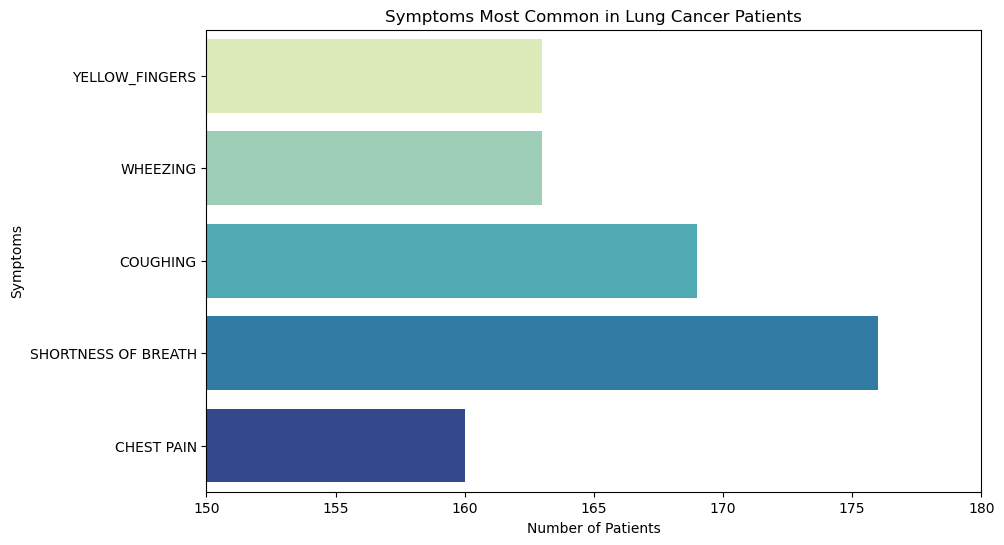

In [19]:
symptoms = ['YELLOW_FINGERS', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'CHEST PAIN']

# คำนวณจำนวนผู้ป่วยที่มีอาการเหล่านี้
symptom_counts = df_positivecase[symptoms].sum()

# สร้างกราฟแท่งแนวนอน
plt.figure(figsize=(10, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='YlGnBu')

# ตั้งชื่อกราฟ
plt.title('Symptoms Most Common in Lung Cancer Patients')
plt.xlabel('Number of Patients')
plt.ylabel('Symptoms')

# กำหนดช่วงของแกน x
plt.xlim(150, 180)

# แสดงกราฟ
plt.show()

## วิเคราะห์อาการของผู้ที่เป็นมะเร็งปอด โดยแยกเพศ

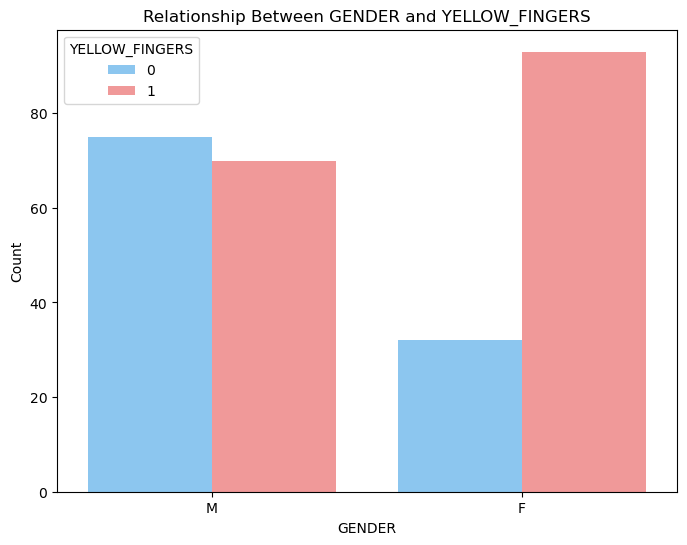

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_positivecase, x='GENDER', hue='YELLOW_FINGERS', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and YELLOW_FINGERS')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

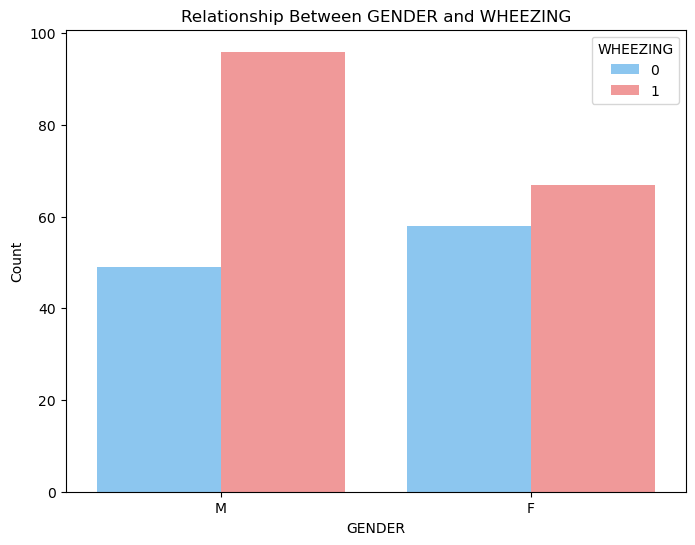

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_positivecase, x='GENDER', hue='WHEEZING', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and WHEEZING')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

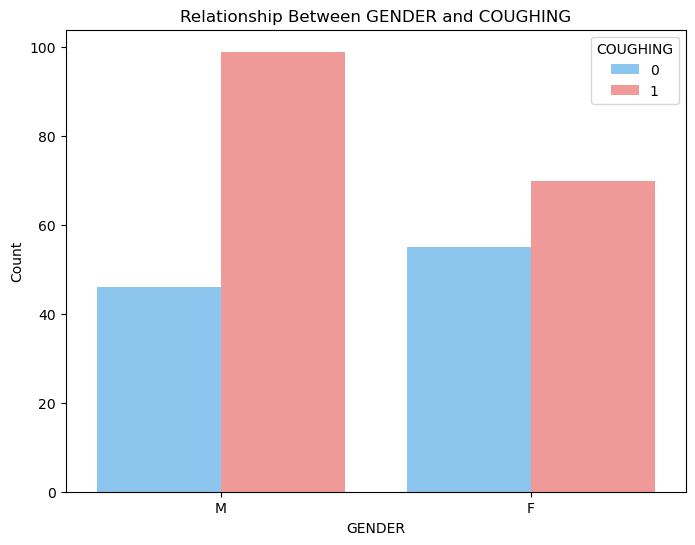

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_positivecase, x='GENDER', hue='COUGHING', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and COUGHING')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

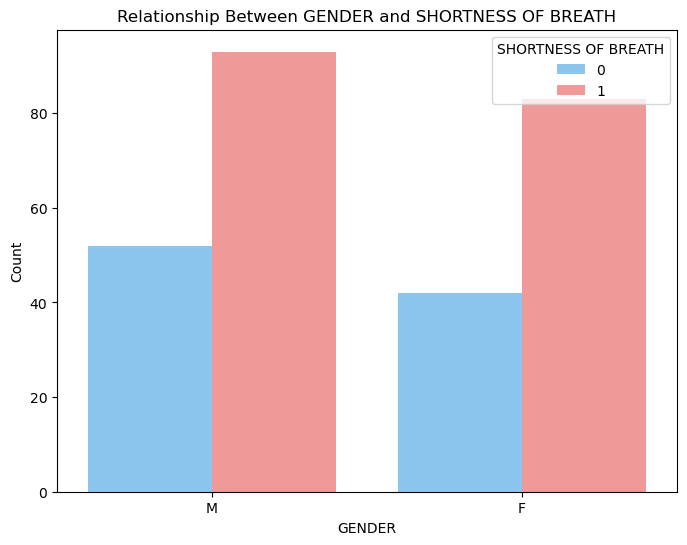

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_positivecase, x='GENDER', hue='SHORTNESS OF BREATH', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and SHORTNESS OF BREATH')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

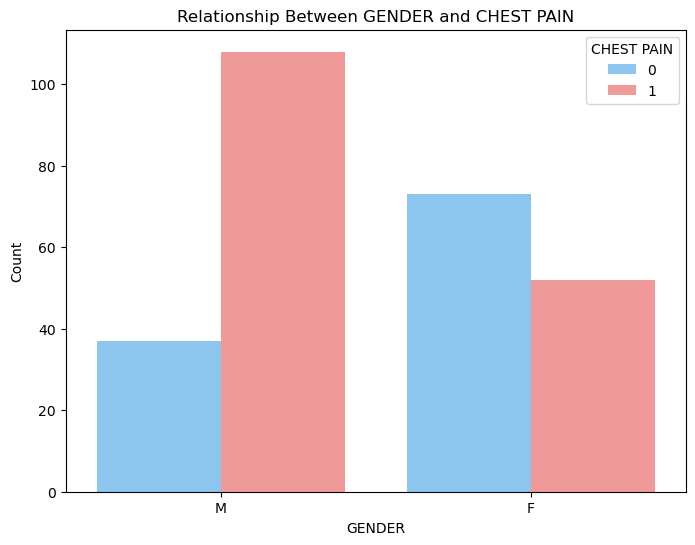

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_positivecase, x='GENDER', hue='CHEST PAIN', palette=['#7BC9FF', '#FF8A8A'])

# ตั้งชื่อกราฟ
plt.title('Relationship Between GENDER and CHEST PAIN')
plt.xlabel('GENDER')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

## ความสัมพันธ์ระหว่าง feature

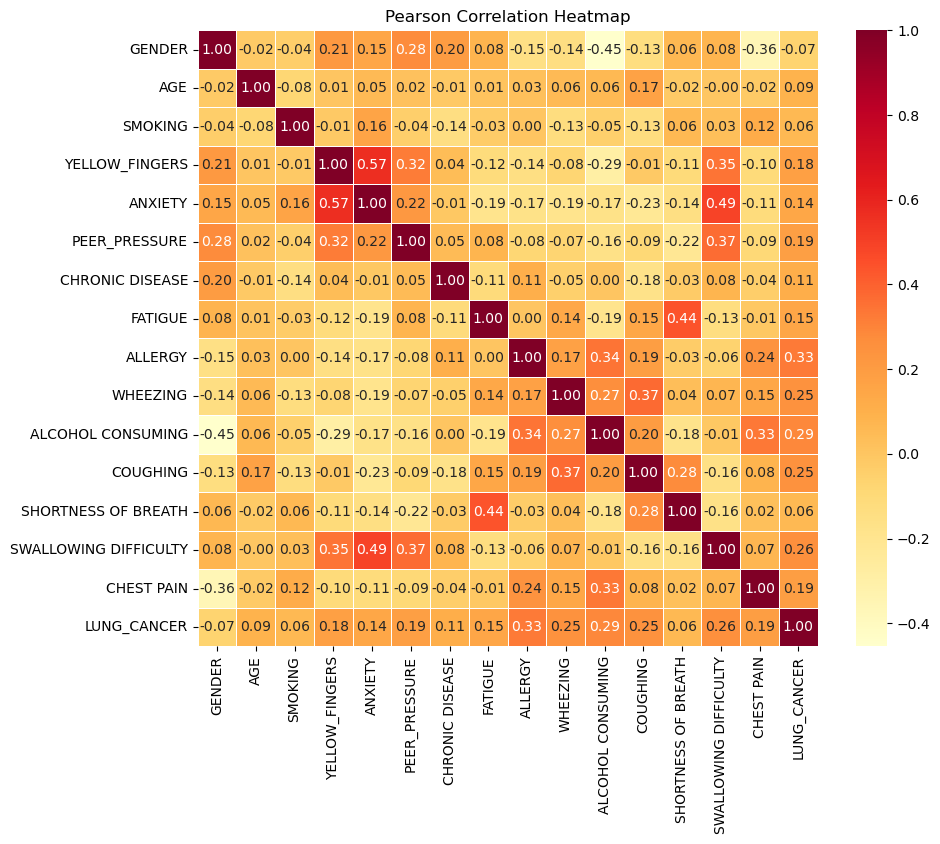

In [25]:
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5)

plt.title('Pearson Correlation Heatmap')

plt.show()

## Machine learning

### K Nearest Neighbors Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

#### ตรวจสอบผลลัพท์

In [30]:
from sklearn import metrics
y_pred = knn.predict(X_test_scaled)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
train_accuracy = knn.score(X_train_scaled, y_train)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

Mean Absolute Error: 0.053763440860215055
Mean Squared Error: 0.053763440860215055
Root Mean Squared Error: 0.23186944788008415
Test Accuracy: 94.62%
Train Accuracy: 93.98%


### Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_scaled, y_train)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importance_df.head(10))


Top 10 Important Features:
                  Feature  Importance
1                     AGE    0.206767
8                 ALLERGY    0.083314
10      ALCOHOL CONSUMING    0.080450
7                 FATIGUE    0.070526
3          YELLOW_FINGERS    0.066067
13  SWALLOWING DIFFICULTY    0.057106
4                 ANXIETY    0.056994
5           PEER_PRESSURE    0.053859
11               COUGHING    0.051732
12    SHORTNESS OF BREATH    0.050190


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## สรุปการวิเคราะห์
### เรื่องทั่วไป
- ผู้ชายมีโอกาสเป็นมะเร็งปอดมากกว่าผู้หญิง
- ช่วงอายุที่พบมากที่สุดคือ 60-65
- บางอาการมีแนวโน้มที่จะแสดงในเพศหนึ่งมากกว่าอีกเพศหนึ่ง
- การสูบบุหรี่มีแนวโน้มทำให้เกิดโรคมะเร็งปอด
- การดื่มแอลกอฮอลล์มีแนวโน้มทำให้เกิดโรคมะเร็งปอด
- คนที่เป็นภูมิแพ้มีแนวโน้มที่จะเป็นมะเร็งปอดด้วย
- อาการที่พบมากที่สุดของผู้ป่วยมะเร็งปอดคือ การหายใจลำบาก และอันดับสองคืออาการไอ

### Machine learning
##### จากการนำ dataset ไปฝึก train model ผลลัพท์ที่ได้คือ
- Mean Absolute Error: 0.053763440860215055
- Mean Squared Error: 0.053763440860215055
- Root Mean Squared Error: 0.23186944788008415
- Test Accuracy: 94.62%
- Train Accuracy: 93.98%
##### มี feature ที่สำคัญคือ
- อายุ
- โรคภูมิแพ้
- การดื่มแอลกอฮอลล์
- ความรู้สึกเหนื่อยล้าหรืออ่อนเพลีย